# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 6: "Living with partner", 
                                       77: np.nan, 99: np.nan})
da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

print((da.RIAGENDRx == 'Female').sum())
print((da.RIAGENDRx == 'Male').sum())


2976
2759


In [3]:

print("Full Dataset:")
print(da.DMDMARTLx.value_counts(), "\n")

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts().unstack()

Full Dataset:
Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 263
Separated               186
Name: DMDMARTLx, dtype: int64 



DMDMARTLx,Divorced,Living with partner,Married,Missing,Never Married,Separated,Widowed
RIAGENDRx,,,,,,,
Female,350,262,1303,127,520,118,296
Male,229,265,1477,136,484,68,100


In [4]:
print(da[((da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40))].DMDMARTLx.value_counts(), "\n")
da[((da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40))].groupby("RIAGENDRx")["DMDMARTLx"].value_counts().unstack()
#.value_counts(normalize=True) for proportions

Married                560
Never Married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Missing                  1
Name: DMDMARTLx, dtype: int64 



DMDMARTLx,Divorced,Living with partner,Married,Missing,Never Married,Separated,Widowed
RIAGENDRx,,,,,,,
Female,46.0,65.0,285.0,NaN,116.0,18.0,2.0
Male,24.0,78.0,275.0,1.0,101.0,12.0,3.0


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [5]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
da[da.RIAGENDRx == "Female"].groupby("agegrp")["DMDMARTLx"].value_counts().unstack().apply(lambda x: x/x.sum(), axis=1)
# ^^ Axis = 1 or Axis = 0 depending on what axis to normalize with .apply, 1 = rows, 0 = columns

DMDMARTLx,Divorced,Living with partner,Married,Missing,Never Married,Separated,Widowed
agegrp,,,,,,,
"(18, 30]",0.018062,0.187192,0.259442,0.091954,0.425287,0.018062,NaN
"(30, 40]",0.090717,0.120253,0.544304,NaN,0.204641,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,NaN,0.125498,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,0.002128,0.089362,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,NaN,0.086168,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,NaN,0.051220,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [6]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
da[da.RIAGENDRx == "Male"].groupby("agegrp")["DMDMARTLx"].value_counts().unstack().apply(lambda x: x/x.sum(), axis=1)
# ^^ Axis = 1 or Axis = 0 depending on what axis to normalize with .apply, 1 = rows, 0 = columns

DMDMARTLx,Divorced,Living with partner,Married,Missing,Never Married,Separated,Widowed
agegrp,,,,,,,
"(18, 30]",0.003676,0.174632,0.191176,0.132353,0.481618,0.012868,0.003676
"(30, 40]",0.052402,0.157205,0.563319,0.002183,0.194323,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,NaN,0.097257,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,NaN,0.103524,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,NaN,0.086957,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,NaN,0.022388,0.034826,0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

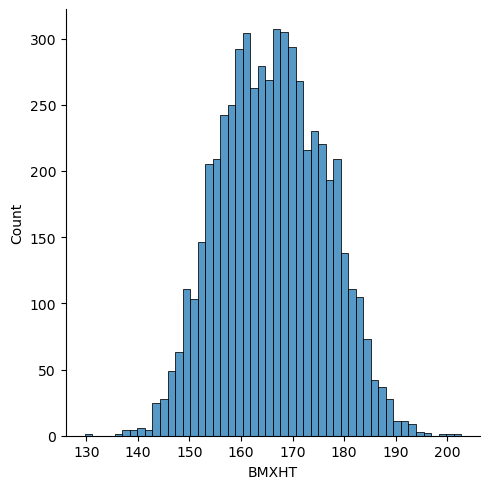

In [7]:
sns.displot(da.BMXHT.dropna(), bins = 50)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

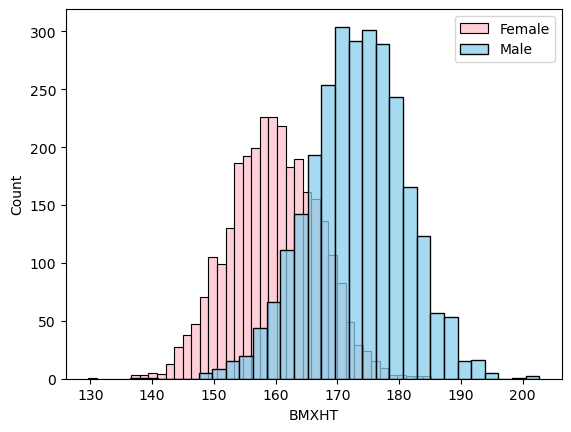

<AxesSubplot:xlabel='BMXHT', ylabel='RIAGENDRx'>

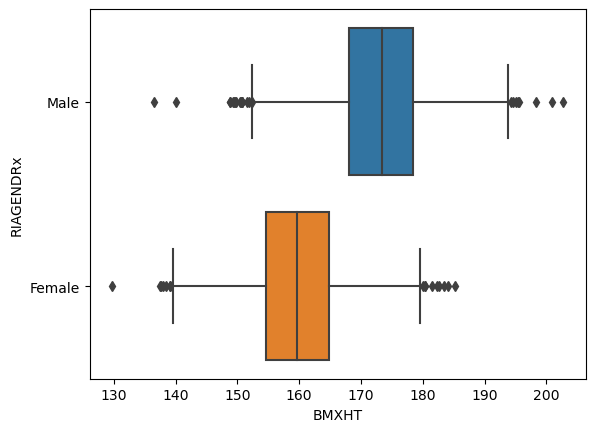

In [8]:
sns.histplot(da[da.RIAGENDRx == "Female"].BMXHT.dropna(), bins = 40, label = 'Female', color = 'pink')

sns.histplot(da[da.RIAGENDRx == "Male"].BMXHT.dropna(), bins = 30, label = 'Male', color = 'skyblue')

plt.legend()
plt.show()

#sns.boxplot(data=da_male.BMXHT.dropna())
#sns.boxplot(data=da_female.BMXHT.dropna())
sns.boxplot(x="BMXHT", y='RIAGENDRx', data=da)  # Make boxplot of BPXSY1 stratified by age group

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: BPXSY_diff, dtype: float64

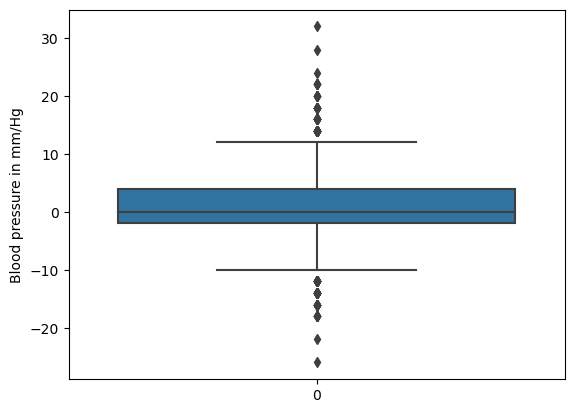

In [9]:
da['BPXSY_diff'] = da.BPXSY1 - da.BPXSY2
da['BPXSY_diff'].head()

bp = sns.boxplot(data=da['BPXSY_diff'])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

da['BPXSY_diff'].describe()


__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [10]:
#Lower on the second compared to the first = a positive difference; ie "Higher on the first reading"
print("Higher on the First Reading:", (da['BPXSY_diff'] > 0).mean())
print("No significant difference between readings:",(da['BPXSY_diff'] == 0).mean())
print("Lower on the First Reading:", (da['BPXSY_diff'] < 0).mean())

Higher on the First Reading: 0.42946817785527464
No significant difference between readings: 0.16547515257192677
Lower on the First Reading: 0.3412380122057541


Therefore, 0.429 is the proportion of the subjects who have a lower SBP on the second reading compared to the first.

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

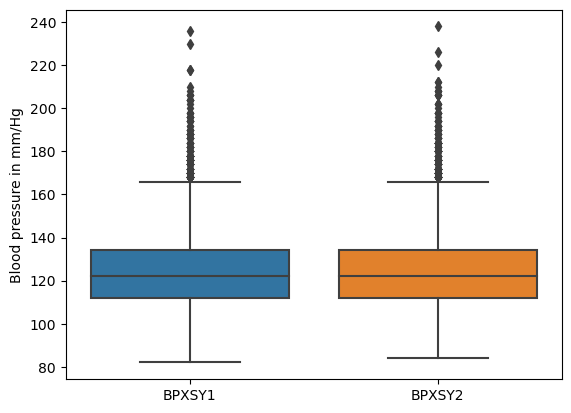

In [11]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [12]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: np.nan, 9: np.nan})

da.groupby('DMDEDUC2x')['DMDHHSIZ'].value_counts().unstack()\
                .apply(lambda x: x/x.sum(), axis = 1)\
                .reindex(["<9", "9-11", "HS/GED", "Some college/AA", "College"])

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
<9,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
9-11,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
HS/GED,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
Some college/AA,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034
College,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622


In [13]:
da.groupby('DMDEDUC2x')['DMDHHSIZ'].mean().reindex(["<9", "9-11", "HS/GED", "Some college/AA", "College"])

DMDEDUC2x
<9                 3.829008
9-11               3.671851
HS/GED             3.275717
Some college/AA    3.173967
College            2.912884
Name: DMDHHSIZ, dtype: float64

<AxesSubplot:xlabel='DMDEDUC2x'>

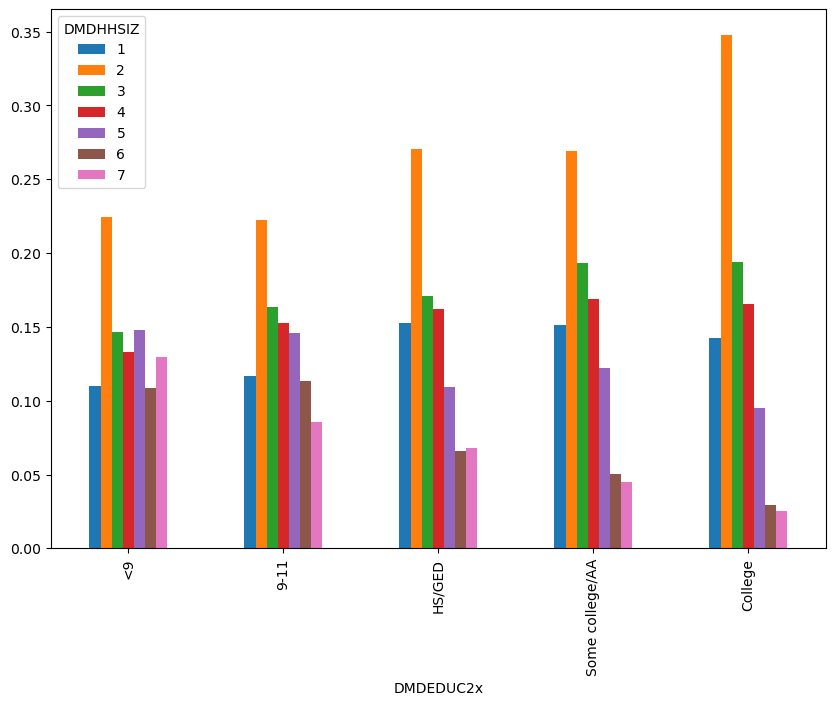

In [14]:
da.groupby('DMDEDUC2x')['DMDHHSIZ'].value_counts().unstack()\
                .apply(lambda x: x/x.sum(), axis = 1)\
                .reindex(["<9", "9-11", "HS/GED", "Some college/AA", "College"]).plot(kind='bar', figsize=(10, 7))

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [15]:
da[((da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40))].groupby(["RIAGENDRx", "DMDEDUC2x"])["DMDHHSIZ"].median().unstack()

DMDEDUC2x,9-11,<9,College,HS/GED,Some college/AA
RIAGENDRx,,,,,
Female,5.0,5.0,3.0,5.0,4.0
Male,4.5,5.0,3.0,4.0,4.0


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [16]:
# insert your code here
chart = da.groupby(by = ['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()
chart

RIDAGEYR       BMXHT     BMXBMI
SDMVSTRA SDMVPSU RIAGENDRx                                  
119      1       Female     47.663265  159.570408  30.052041
                 Male       47.861111  172.741667  26.958333
         2       Female     52.987952  159.244578  27.849398
                 Male       54.363636  172.906818  27.160465
120      1       Female     43.636364  155.402041  32.419388
                 Male       43.130000  169.537755  30.939175
         2       Female     43.736111  159.218056  27.400000
                 Male       45.219178  173.075342  27.727397
121      1       Female     44.397959  158.871579  30.856842
                 Male       46.750000  172.177885  29.416505
         2       Female     44.376344  160.229032  26.470968
                 Male       42.063158  174.764516  26.273118
122      1       Female     42.897436  161.315385  29.447436
                 Male       44.653061  173.998969  28.528866
         2       Female     47.333333  157.231111  26.611111
                 Male       44.320000  170.332323  25.744444
123      1       Female     44.841121  162.059615  29.905769
                 Male       47.829787  174.315217  29.231522
         2       Female     46.457447  160.476596  30.641489
                 Male       52.126582  174.454430  28.811392
124      1       Female     51.664000  158.788710  29.533065
                 Male       50.750000  172.109009  28.614414
         2       Female     42.541667  162.853521  28.640845
                 Male       48.245614  174.291228  27.714035
125      1       Female     50.900901  160.762385  30.385321
                 Male       55.165289  173.631092  29.727731
         2       Female     51.660000  160.021429  28.564286
                 Male       49.705882  174.456863  29.143564
126      1       Female     46.229167  160.387500  31.262500
                 Male       48.416667  175.149398  29.033333
         2       Female     47.205882  160.892000  29.612121
                 Male       48.666667  174.713043  29.039130
127      1       Female     49.694444  157.422430  32.189720
                 Male       53.137931  171.545349  31.062353
         2       Female     51.486239  159.022936  30.770642
                 Male       54.070588  173.366667  30.557831
128      1       Female     55.638462  156.339063  32.303125
                 Male       53.673267  169.325000  31.749000
         2       Female     45.589744  160.437179  27.491026
                 Male       45.822785  172.400000  26.835443
129      1       Female     45.329787  156.900000  29.019149
                 Male       43.922222  171.094318  26.493182
         2       Female     43.500000  161.034259  29.429630
                 Male       45.775510  173.138298  28.961702
130      1       Female     47.810526  161.977895  30.700000
                 Male       50.516854  176.974157  30.337079
         2       Female     50.833333  160.060577  31.490385
                 Male       50.535354  175.061224  29.237755
131      1       Female     54.893617  161.989362  30.061702
                 Male       53.140187  175.610476  28.259615
         2       Female     45.000000  161.673810  32.984127
                 Male       46.778846  175.091346  30.077885
132      1       Female     43.210526  161.508421  29.848421
                 Male       42.380435  172.534066  28.546154
         2       Female     51.700000  159.138281  30.540625
                 Male       49.038760  172.809524  28.966667
133      1       Female     45.105882  158.295122  27.959259
                 Male       44.054795  171.509722  27.495833
         2       Female     47.063158  158.627368  29.000000
                 Male       47.489796  171.179167  27.966667

In [17]:
chart = da.groupby(by = ['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()
print("-----COMBINED GENDER RATIOS-----")
print('RIDAGEYR', chart.loc[:, 'RIDAGEYR'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXHT', chart.loc[:, 'BMXHT'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXBMI', chart.loc[:, 'BMXBMI'].max()/ chart.loc[:, 'RIDAGEYR'].min())

chart = da[da.RIAGENDRx == 'Female'].groupby(by = ['SDMVSTRA', 'SDMVPSU'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()
print("-----WOMEN RATIOS-----")
print('RIDAGEYR', chart.loc[:, 'RIDAGEYR'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXHT', chart.loc[:, 'BMXHT'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXBMI', chart.loc[:, 'BMXBMI'].max()/ chart.loc[:, 'RIDAGEYR'].min())

chart = da[da.RIAGENDRx == 'Male'].groupby(by = ['SDMVSTRA', 'SDMVPSU'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()
print("-----MEN RATIOS-----")
print('RIDAGEYR', chart.loc[:, 'RIDAGEYR'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXHT', chart.loc[:, 'BMXHT'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXBMI', chart.loc[:, 'BMXBMI'].max()/ chart.loc[:, 'RIDAGEYR'].min())

-----COMBINED GENDER RATIOS-----
RIDAGEYR 1.322736197736198
BMXHT 4.207343579534591
BMXBMI 0.7841571730460619
-----WOMEN RATIOS-----
RIDAGEYR 1.3078580577111432
BMXHT 3.828094522078603
BMXBMI 0.7753369712233571
-----MEN RATIOS-----
RIDAGEYR 1.3114871069416525
BMXHT 4.207343579534591
BMXBMI 0.7547935435435437


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [18]:
chart = da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']]\
                .apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
chart

RIDAGEYR   BMXHT  BMXBMI
SDMVSTRA SDMVPSU RIAGENDRx                          
119      1       Female        31.25   9.325   9.750
                 Male          29.75   9.000   5.350
         2       Female        33.50   9.950   9.350
                 Male          29.00  11.225   5.300
120      1       Female        26.50   8.750   8.775
                 Male          23.75  12.125   9.400
         2       Female        25.75  10.550   7.750
                 Male          26.00  10.500   7.100
121      1       Female        26.25   9.150   9.000
                 Male          34.50  10.725   7.500
         2       Female        26.00   9.600   8.100
                 Male          25.50   8.600   5.700
122      1       Female        24.00  10.400   9.875
                 Male          29.50   9.400   7.700
         2       Female        25.00   7.575   8.475
                 Male          30.00  10.150   4.100
123      1       Female        30.50   9.675  10.450
                 Male          28.25   9.350   8.050
         2       Female        34.50  11.200   9.975
                 Male          31.50   9.900   8.100
124      1       Female        27.00   8.375   8.950
                 Male          32.00   9.800   6.100
         2       Female        23.50   8.650   9.000
                 Male          31.00  11.600   8.700
125      1       Female        31.00   9.100   8.000
                 Male          29.00  10.350   8.300
         2       Female        32.25  10.675  10.325
                 Male          33.50   7.925   7.900
126      1       Female        30.25   8.500  10.675
                 Male          36.25  10.450   8.000
         2       Female        31.75  12.025  10.350
                 Male          34.00   8.125   6.850
127      1       Female        27.25   7.700  11.750
                 Male          30.00   9.025   8.200
         2       Female        30.00  11.600   9.200
                 Male          28.00  10.750   5.950
128      1       Female        28.00   9.125   8.500
                 Male          33.00   9.950   6.675
         2       Female        22.00  10.650   9.375
                 Male          25.50   9.850   5.800
129      1       Female        24.75  10.375   9.500
                 Male          20.75  12.300   6.025
         2       Female        26.25   8.900   9.725
                 Male          30.75  10.700   5.800
130      1       Female        35.50   8.650  11.200
                 Male          36.00   9.900   6.700
         2       Female        30.25  10.225   8.050
                 Male          28.50   8.625   8.375
131      1       Female        35.75  10.025  11.075
                 Male          36.00  10.500   7.525
         2       Female        24.00   7.575  10.625
                 Male          28.00   7.750   7.850
132      1       Female        30.00  10.950  10.700
                 Male          21.25  10.600   6.600
         2       Female        33.00  10.100  11.750
                 Male          38.00  10.550   9.600
133      1       Female        34.00  10.300   8.300
                 Male          33.00   8.925   6.425
         2       Female        28.50   9.550   9.650
                 Male          32.25   8.850   5.900

In [19]:
chart = da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']]\
                .apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("-----COMBINED GENDER RATIOS-----")
print('RIDAGEYR', chart.loc[:, 'RIDAGEYR'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXHT', chart.loc[:, 'BMXHT'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXBMI', chart.loc[:, 'BMXBMI'].max()/ chart.loc[:, 'RIDAGEYR'].min())

chart = da[da.RIAGENDRx == 'Female'].groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']]\
                .apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("-----WOMEN RATIOS-----")
print('RIDAGEYR', chart.loc[:, 'RIDAGEYR'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXHT', chart.loc[:, 'BMXHT'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXBMI', chart.loc[:, 'BMXBMI'].max()/ chart.loc[:, 'RIDAGEYR'].min())

chart = da[da.RIAGENDRx == 'Male'].groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']]\
                .apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("-----MEN RATIOS-----")
print('RIDAGEYR', chart.loc[:, 'RIDAGEYR'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXHT', chart.loc[:, 'BMXHT'].max()/ chart.loc[:, 'RIDAGEYR'].min())
print('BMXBMI', chart.loc[:, 'BMXBMI'].max()/ chart.loc[:, 'RIDAGEYR'].min())

-----COMBINED GENDER RATIOS-----
RIDAGEYR 1.8313253012048192
BMXHT 0.5927710843373499
BMXBMI 0.5662650602409639
-----WOMEN RATIOS-----
RIDAGEYR 1.625
BMXHT 0.5465909090909093
BMXBMI 0.5340909090909091
-----MEN RATIOS-----
RIDAGEYR 1.8313253012048192
BMXHT 0.5927710843373499
BMXBMI 0.46265060240963846


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.